# Partial Autocorrelations

### In this notebook, we plot the partial autocorrelations of the time series in oour dataset.

### Import packages

In [1]:
%matplotlib inline

import os
import pandas as pd, numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from IPython.display import IFrame
from matplotlib import pyplot

pyplot.rcParams["figure.figsize"] = (20, 10)

/home/ariel/anaconda3/envs/poetry-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/home/ariel/anaconda3/envs/poetry-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### Global variables

In [2]:
DATA = "../data"

# STEP 0: Load the data

In [3]:
df = pd.read_csv(os.path.join(DATA, "assets-prices-no-missing-values.csv"), index_col=0)

print(f"Size of the data: {df.shape}\n\n")
df.head()

Size of the data: (1491, 8)




,AC.PA,BNP.PA,CAP.PA,ENGI.PA,G.MI,RACE.MI,SAN.PA,TIT.MI
Date,,,,,,,,
2018-01-02,43.480000,62.090000,99.000000,14.230000,15.020000,87.300003,71.760002,0.725500
2018-01-03,43.310001,62.639999,101.000000,14.290000,14.890000,88.800003,72.070000,0.725000
2018-01-04,43.599998,63.770000,101.349998,14.515000,15.000000,92.500000,73.000000,0.734000
2018-01-05,43.770000,63.889999,102.500000,14.595000,15.200000,93.349998,74.360001,0.738500
2018-01-06,43.973334,64.093333,102.466667,14.626667,15.203333,93.783333,74.356667,0.743167


# STEP 1: Plot the Partial Autocorrelations
<font size=4>We analyze the partial autocorrelations in the time series to be able to take the relevant assumptions when modelling them.</font>

We use the [Pearson's critical correlations table](https://www.real-statistics.com/statistics-tables/pearsons-correlation-table) that is displayed here below.

In [4]:
IFrame("../img/pearsons-correlation-table.png", width=1000, height=500)

<font size=4>In the the Pearson's critical correlations table, we can find what is the critical correlation threshold that we should use depending of the:

- <font size=4>Degree of freedom of our problem, which is about 100 (we have DoF = number of observations or rows - 2 = 1491 - 2 ~ 1500)

- <font size=4>Confidence = 0.05

<font size=4>According to the table, the critical correlation is 0.05, so we consider this value as the threshold to assess significant partial autocorrelations.
    
<font color='red' size=4>Note that you could consider a diffrent confidence value or even a diffrent approach to determine the significatnt correlations threshold, our approach is not madatory.

In [5]:
critical_correlation = 0.05

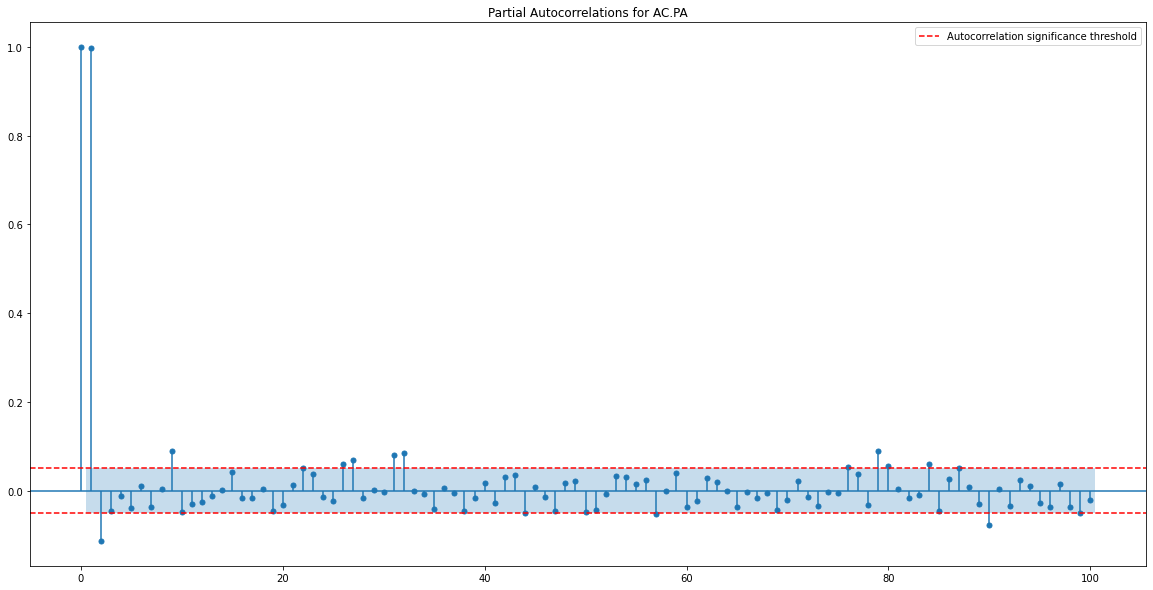

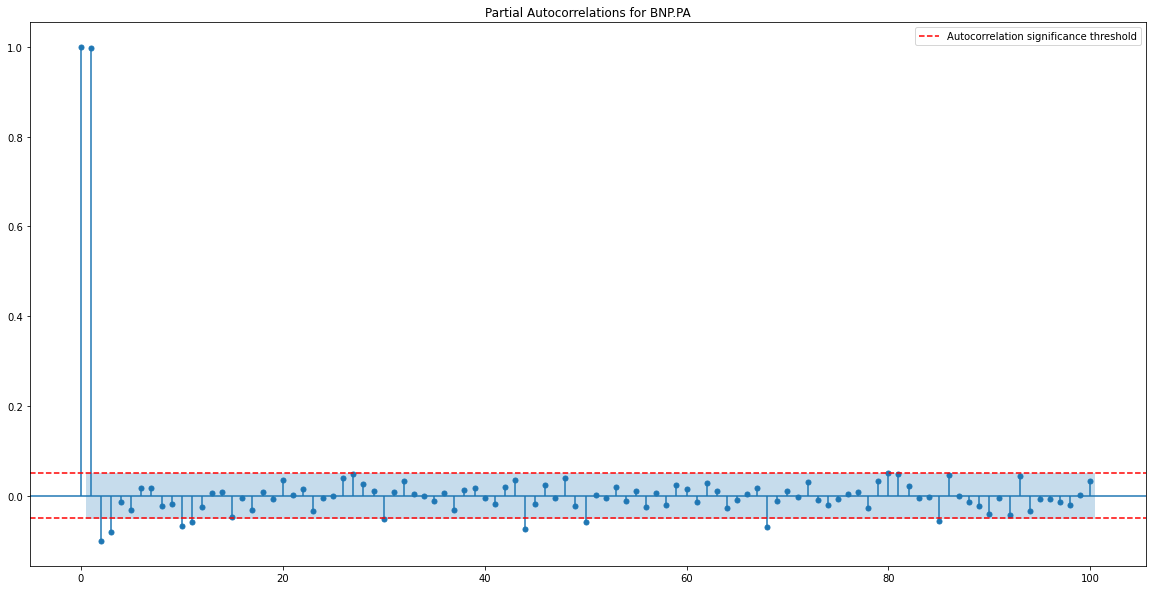

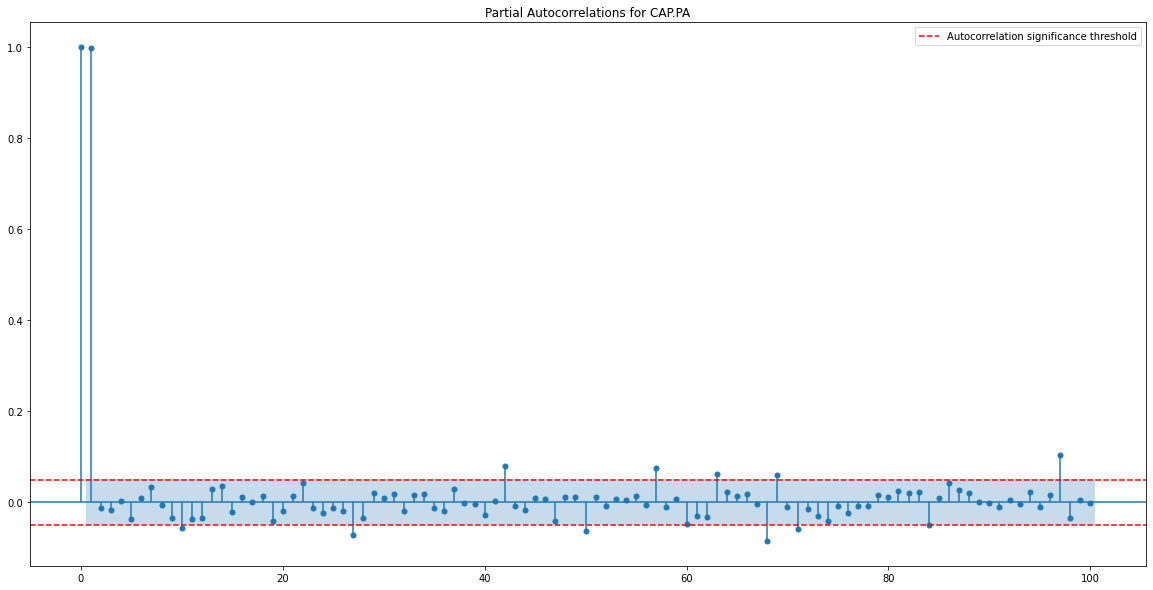

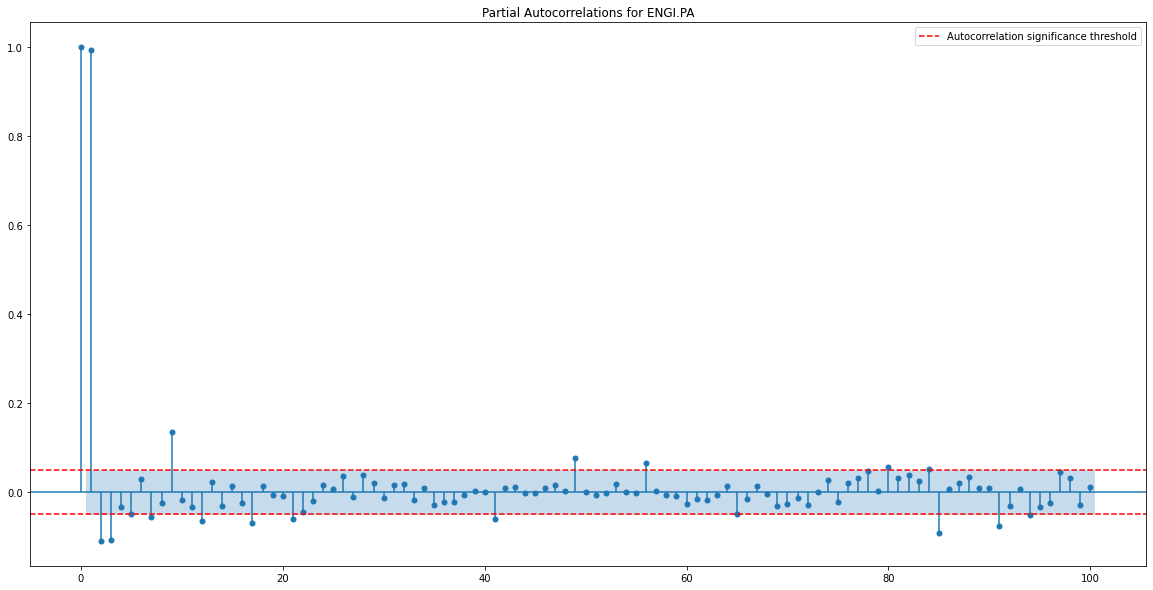

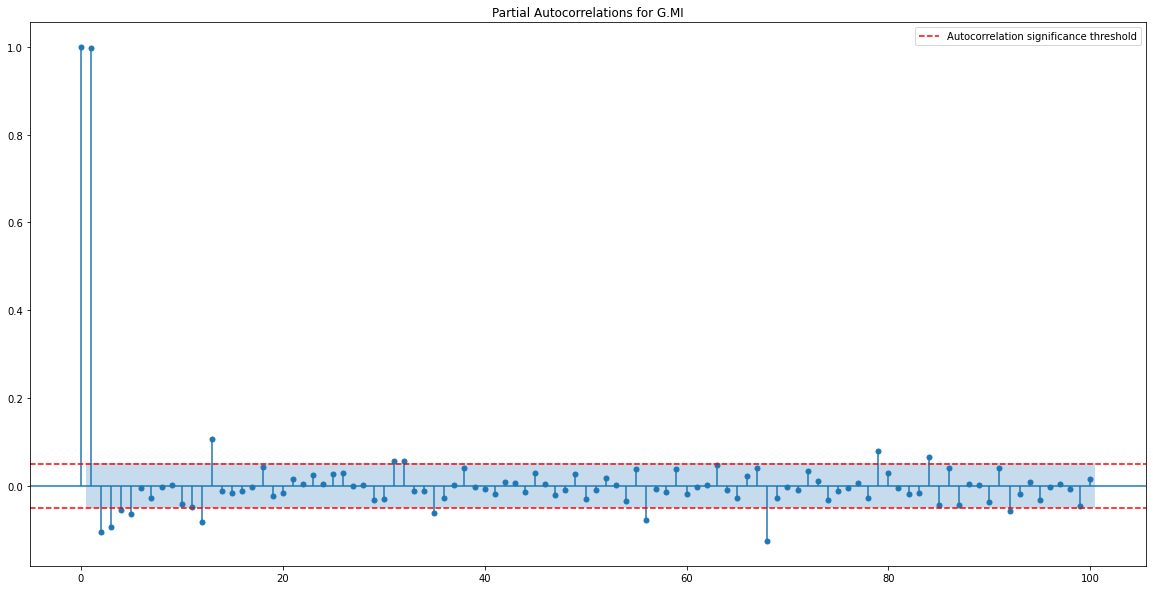

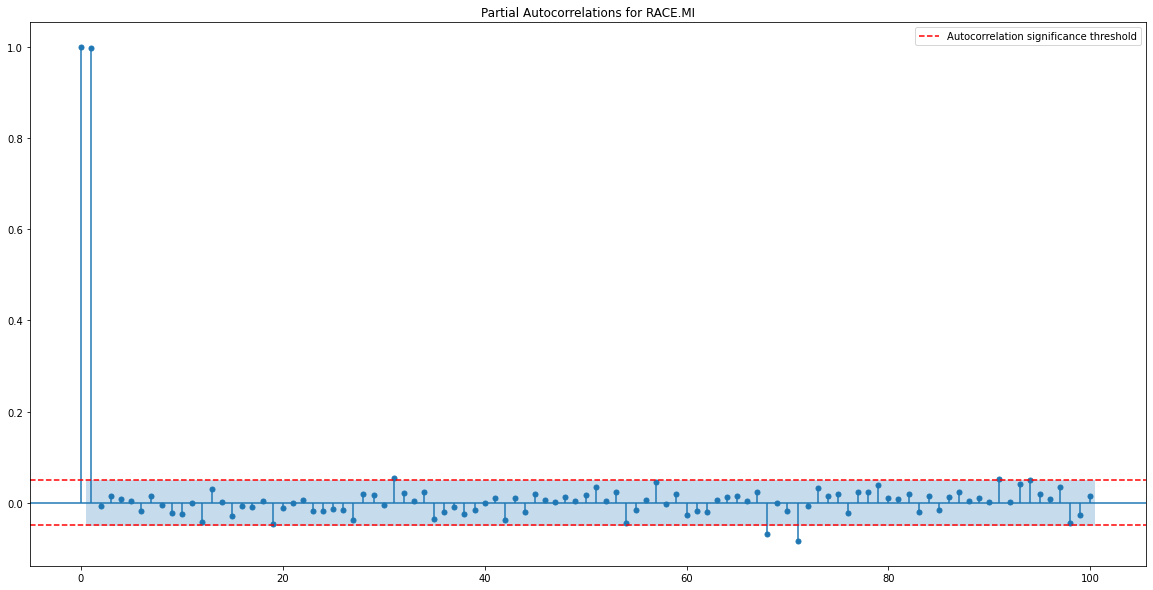

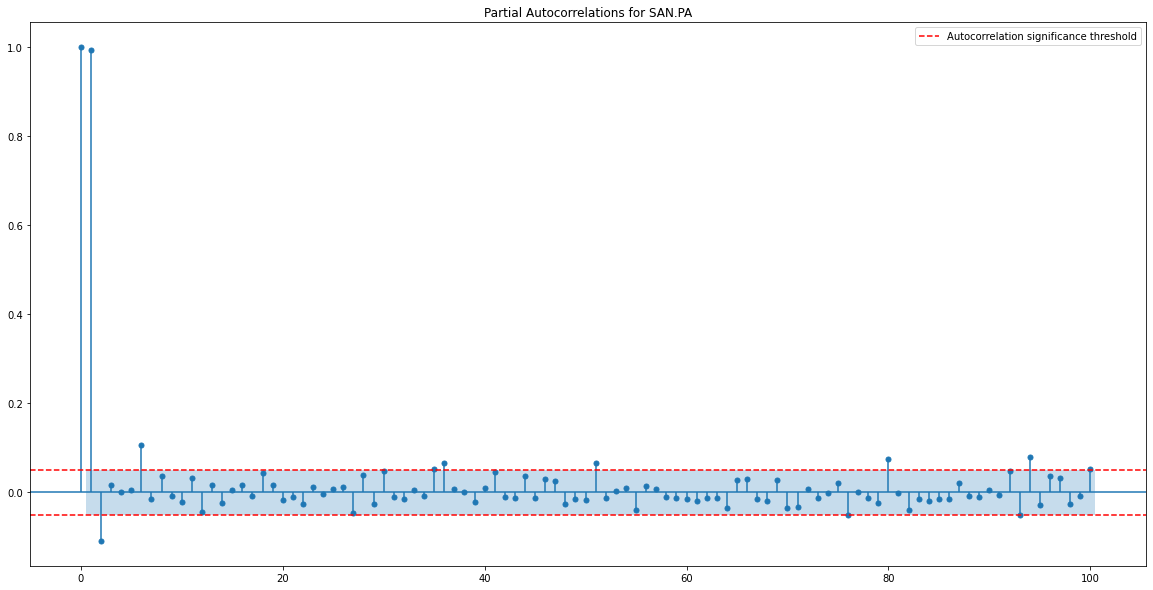

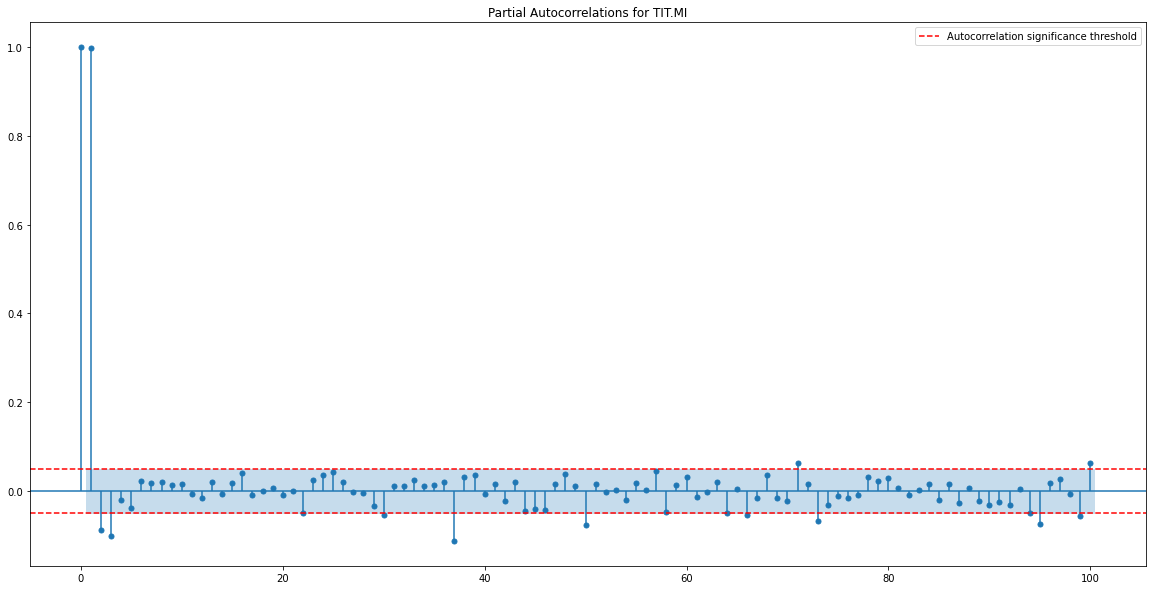

CPU times: user 9.56 s, sys: 17.6 s, total: 27.1 s
Wall time: 2.24 s


In [6]:
%%time
for c in df.columns:
    plot_pacf(df[c], lags=100, method="yw")
    pyplot.gca().set_title(f"Partial Autocorrelations for {c}")
    pyplot.axhline(
        y=critical_correlation,
        color="r",
        linestyle="--",
        label="Autocorrelation significance threshold",
    )
    pyplot.axhline(y=-critical_correlation, color="r", linestyle="--")
    pyplot.legend(loc="upper right")
    pyplot.show()

<font color='blue' size=4>The partial autocorrelation plots show many things:</font>
- <font color='blue' size=4>They confirm the seasonality in all the time series
- <font color='blue' size=4>The seasonality varies from one time series to another
- <font color='blue' size=4>All the time series are autocorrelated, which means that each value can be determined using some of its preceding lags
- <font color='blue' size=4>The number of lags to be considered for the autocorrelation varies from one time series to anoter
    
<font color='blue' size=4>Also, we can observe that:
- <font color='blue' size=4>Some time series like ACPA and BNP.PA present a shorter seasonality period that are about 10 lags or days (as we have daily prices), whereas others like TIT.MI present longer seasonality.
- <font color='blue' size=4>Some time series like G.MI present partial autocorrelations until lag 15
    
<font color='blue' size=4>So, it would be relevant to consider all these observations when building our forecast models.